 **GOLD PRICE PREDICTION** - DK

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# to split the data into train and test
from sklearn.model_selection import train_test_split
#then we import random forest regressor model from sklearn
from sklearn.ensemble import RandomForestRegressor
#then we need to import metrics which helps  in finding the performance of our model
from sklearn import metrics

In [3]:
# Next step is data collection and processing
#loading the csv data in pandas dataframe 
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
#we print first 5 rows of the dataframe so we use head()function
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#inorder to know the last date we are going to print the last rows as well 
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
#finding the number of datapoints that is no of rows and columns
gold_data.shape

(2290, 6)

In [7]:
#getting some basic info about our data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking the number of missing values using isnull().sum() this gives number of missing values in each column
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#lets get some statistical measures of the data using describe() function
gold_data.describe()
#in the op 25% means 25 percent values are less than that number similarly for 50%,75%

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
# DATA ANALYSIS now we are going to do some analysis on this data so lets find the correlation between various columns in the dataset 
#there are two types of correlation positive correlation and negative correlation while working on regression projects it will always tells about this which columns are related to which column


#lets create a variable called correlation and calculate correlation in it
correlation = gold_data.corr()

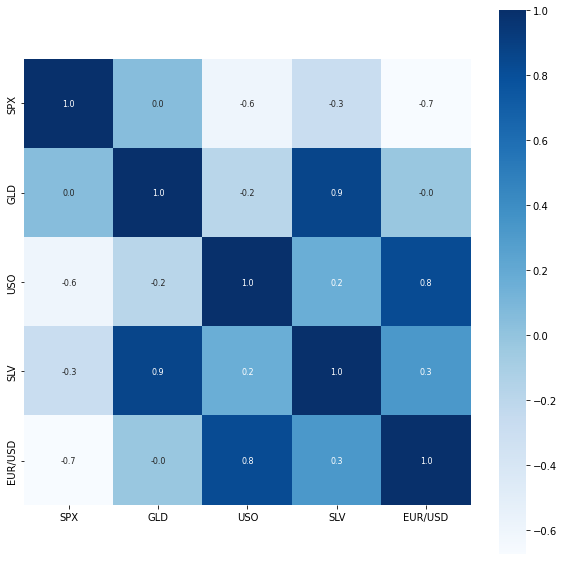

In [11]:
#now we can construct the heat map to understand this correlation values
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt ='.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues') 
#explanation for this code refer notes

In [12]:
#now lets calculate the corr values of the gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


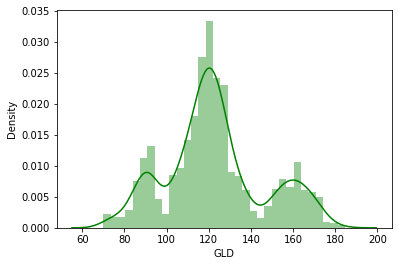

In [13]:
#CHECK THE DISTRIBUTION OF THE GLD PRICE this is done by dist plot or distribution plot present in seaborn library
sns.distplot(gold_data['GLD'] ,color = 'green')

In [14]:
#refer notes
#SPLITING THE FEATURES AND TARGET here the other col are features and gld is target 
#we are going to drop two columns from our data set
X = gold_data.drop(['Date','GLD'], axis =1) #here we are dropping date and gld 
#whenever we are dropping col then we should put axis - 1 and whenever we are dropping row then we should put axis = 0
#now we store this GLD col in Y
Y = gold_data['GLD']

In [17]:
print(X) #now we will have all the feature col in X , so we will use this stock prices to predict the gold value

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y) #in this we have stored the target col

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [18]:
#spliting into training data and testing data
#so we create four variables that is x will be seperated into xtrain and xtest similarly for y so 80% will go into xtrain and 20% will go into xtest same for y
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =2)

In [19]:
# now lets lood this random forest regressor to regressor varaible that we are going to create
regressor = RandomForestRegressor(n_estimators=100) #here the estimators value we keep some default

In [20]:
#now loading is over so lets train our model
#now lets call regressor and fit the data into it using fit() func and provide the training data as parameters
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [21]:
#now we have trained our model so lets evaluate our model using predict function 
#so fit() it is used to train our model and predict() it is used to test our model
#MODEL EVALUATION
test_data_prediction = regressor.predict(X_test) #here we give features as pramatere thaat is x_train bcoz using this only we have to predict the gold price
print(test_data_prediction)

[168.63909916  82.26739962 115.9376001  127.53570107 120.69760189
 154.85469724 150.42329862 126.13189983 117.67099872 126.17760033
 116.58780086 172.11120099 142.0325986  167.83499856 115.14390033
 117.77740063 140.30910295 170.18190069 159.84910273 159.4114991
 155.17610019 124.85480056 175.87540005 157.82160371 125.26420063
  94.05059988  77.3329     120.66970001 119.1098994  167.54489988
  88.17810076 125.28070021  91.24780099 117.79929993 121.12159917
 136.26090093 115.6577013  115.2360008  148.53230031 107.34150056
 104.53080251  87.24979787 126.57720053 117.88260041 153.85189928
 119.69460013 108.50919954 108.12309808  93.30610039 126.99829825
  74.62060031 113.79119937 121.55149967 111.31889913 118.69529873
 120.50479955 160.29389976 169.00850187 147.14809705  85.73009854
  94.20810039  86.81309881  90.64630031 118.99590065 126.37440064
 127.38549968 169.54380033 122.21069924 117.24799905  98.46360052
 168.35950136 143.35809836 131.59950257 121.24420211 121.13669954
 119.872000

In [22]:
#now the above are the values predicted by our value so now lets check the r squared error between our real and predicted values using metric library
#lets create a var called error_score and calculate the r squared error value
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("the r squared error is:", error_score)
#here real value is y_test and predicted value is test_data_prediction

the r squared error is: 0.9892068198573033


In [23]:
#REFER NOTES
#now there is another way to analyse our model by plotting the real and predicted values
#here y_test is pd series df so lets covert it into list so that it wont show any error in plotting
Y_test = list(Y_test)

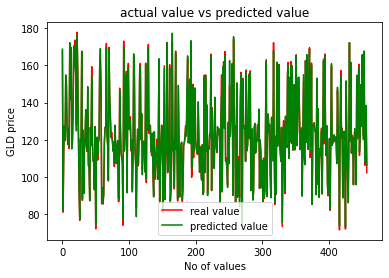

In [25]:
plt.plot(Y_test, color = 'red', label = 'real value')
plt.plot(test_data_prediction, color = 'green', label = 'predicted value')
plt.title('actual value vs predicted value')
plt.xlabel('No of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

COMPLETED SUCCESSFULLY - DK